# Plotting precipitation data using gradient method for shading

This is a single cell notebook to demonstrate precipitation plotting using Magics' gradient method for shading.  

Many waypoint colours can be set using gradients, and Magics will calculate shades in between.
Using parameter **contour_gradients_waypoint_method** we control if these waypoint colours will be included in our shading, and in which position.  

With the current settings the linear interpolation in the RGB colour space with 10 steps between the two waypoints is the default. There are other gradient techniques available on top of the RGB-base one. These are as follows:

   * HCL: the interpolation is done in the Hue-Chroma-Lightness colour space
   * HSL: the interpolation is done in the Hue-Saturation-Lightness colour space  

In this notebook, we will be using HSL colour space.

At ECMWF 
#### From your workstation:
module swap (or load) Magics/new   
jupyter notebook  

load this notebook

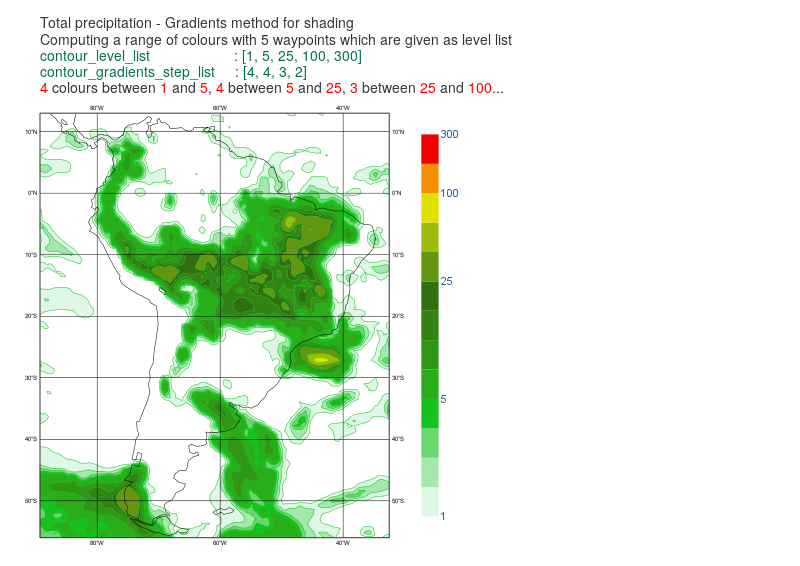

In [1]:
import Magics.macro as magics

#Setting the geographical area
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "south_america",
    page_id_line             = "off"
)

#Setting the coastline
coast = magics.mcoast()

#Loading GRIB file
tp = magics.mgrib(grib_input_file_name = "total_precipitation.grib")

#Defining the contour
contour = magics.mcont(
    legend                            = "on",
    contour_line_colour               = "RGB(0.08637,0.7607,0.1201)",
    contour_highlight                 = "off",
    contour_level_selection_type      = "level_list",
    contour_level_list                = [1.,5.,25.,100.,300.],
    contour_label                     = "off",
    contour_shade                     = "on",
    contour_shade_colour_method       = "gradients",
    contour_gradients_technique       = "hcl",
    contour_shade_method              = "area_fill",
    contour_gradients_colour_list     = ["RGB(0.8739,0.9692,0.8946)","RGB(0.08637,0.7607,0.1201)","RGB(0.1949,0.4348,0.07497)","RGB(0.8824,0.8824,0)","RGB(0.9412,0,0)"],
    contour_gradients_waypoint_method = "left",
    contour_gradients_step_list       = [4,4,3,2]
    )

#Defining the legend
legend = magics.mlegend(
    legend_display_type        = "continuous",
    legend_box_mode            = "automatic",
    legend_automatic_position  = "right",
    legend_text_composition    = "user_text_only",
    legend_values_list         = [1.,5.,25.,100.,300.],
    legend_text_font_size      = "0.45",
    legend_text_colour         = "#2b619e",    
    legend_entry_border        = "on",
    legend_entry_border_colour = "none") 

#Setting the title
title = magics.mtext( 
    text_lines          = ["Total precipitation - Gradients method for shading", 
                           "Computing a range of colours with 5 waypoints which are given as level list",
                           "<font colour='evergreen'>contour_level_list                     : [1, 5, 25, 100, 300]</font>",
                           "<font colour='evergreen'>contour_gradients_step_list     : [4, 4, 3, 2]</font>",
                           "<font colour='red'>4</font> colours between <font colour='red'>1</font> and <font colour='red'>5</font>, <font colour='red'>4</font> between <font colour='red'>5</font> and <font colour='red'>25</font>, <font colour='red'>3</font> between <font colour='red'>25</font> and <font colour='red'>100</font>..."],
    text_justification  = 'left',
    text_font_size      = 0.6,
    text_mode           = "automatic",
    text_colour         = "charcoal") 

#Plotting
magics.plot(projection, tp, contour, coast, legend, title)